In [16]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Nobel Prize Dataframe

In this case we have a dataset where we have the winners of the different Nobel prizes from *1901* to *2016*.

In [21]:
nobel <- read_csv("/content/sample_data/nobel.csv")
head(nobel)

Rows: 911 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): category, prize, motivation, prize_share, laureate_type, full_nam...
dbl   (2): year, laureate_id
date  (2): birth_date, death_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>
1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions""",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect""",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NA,NA,NA,1907-09-07,Châtenay,France
1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its application against diphtheria, by which he has opened a new road in the domain of medical science and thereby placed in the hands of the physician a victorious weapon against illness and deaths""",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
1901,Peace,The Nobel Peace Prize 1901,NA,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NA,NA,NA,1910-10-30,Heiden,Switzerland
1901,Peace,The Nobel Peace Prize 1901,NA,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NA,NA,NA,1912-06-12,Paris,France
1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him""",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


In [19]:
names(nobel)

[1] "year"                 "category"             "prize"               
 [4] "motivation"           "prize_share"          "laureate_id"         
 [7] "laureate_type"        "full_name"            "birth_date"          
[10] "birth_city"           "birth_country"        "sex"                 
[13] "organization_name"    "organization_city"    "organization_country"
[16] "death_date"           "death_city"           "death_country"

## Knowing the set in a general way

The first thing we will do is to answer the following questions that will give us general information about the set:

- How many awards are recorded in this set?
- How many awards have been won by men and women?
- Which countries have won the most awards?

In [23]:
# Premios registrados
nobel %>% count()

# Premios ganador por homre y mujer
nobel %>%
  group_by(sex) %>%
  count()

# Premios por país
nobel %>%
    group_by(birth_country) %>%
    count()  %>% 
    arrange(desc(n))  %>% 
    head(20)

n
<int>
911


sex,n
<chr>,<int>
Female,49
Male,836
NA,26


birth_country,n
<chr>,<int>
United States of America,259
United Kingdom,85
Germany,61
France,51
Sweden,29
NA,26
Japan,24
Canada,18
Netherlands,18


## Winning percentage of USA by decade

 Knowing that **USA** is the country that has won the most, we will know the winning percentage they have had per decade.

In [24]:
prop_usa_winners <- nobel %>% 
    mutate(usa_born_winner = birth_country == "United States of America",
           decade = floor(year / 10) * 10 ) %>% 
    group_by(decade) %>%
    summarize(proportion = mean(usa_born_winner, na.rm = TRUE))
  
prop_usa_winners

decade,proportion
<dbl>,<dbl>
1900,0.01785714
1910,0.07894737
1920,0.07407407
1930,0.25454545
1940,0.32500000
1950,0.29577465
1960,0.28000000
1970,0.32038835
1980,0.32978723


We see that it is from *1930* that **USA** starts to have a much higher percentage than the other countries. It is easier to see this if we graph it.

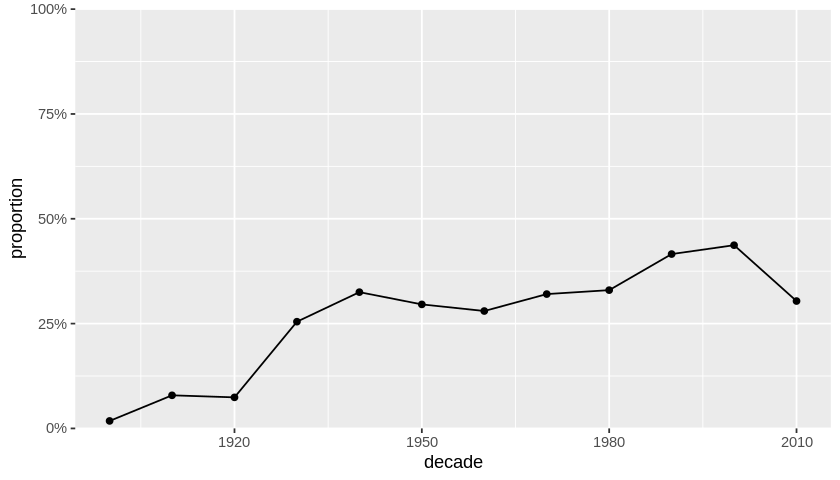

In [26]:
options(repr.plot.width=7, repr.plot.height=4)

ggplot(prop_usa_winners, aes(decade, proportion)) +
    geom_line() + geom_point() +
    scale_y_continuous(labels = scales::percent, limits = 0:1, expand = c(0,0))

## Winning percentage between male and female.

Knowing the following data:

|Gender|Winners|
|---|---|
|Male|836|
|Female|49|
|NA|26|

The following question may arise

### What is the winning percentage between male and female in the different categories?

`summarise()` has grouped output by 'decade'. You can override using the
`.groups` argument.


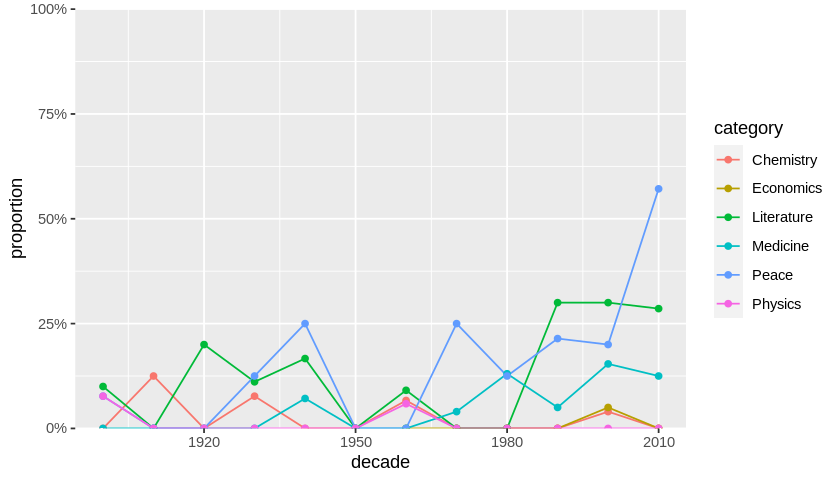

In [27]:
prop_female_winners <- nobel %>%
    mutate(female_winner = sex == "Female",
           decade = floor(year / 10) * 10)  %>% 
    group_by(decade, category)  %>% 
    summarize(proportion = mean(female_winner, na.rm = TRUE))

ggplot(prop_female_winners, aes(decade, proportion, color = category)) +
    geom_line() + geom_point() +
    scale_y_continuous(labels = scales::percent, limits = 0:1, expand = c(0,0))

Analyzing the graph we can conclude the following:

- The categories where the fewest women have won are as follows:
  - Physics
  - Chemistry
  - Economics
- The categories where the most women have won are the following:
  - Literature
  - Medicine
  - Peace

## Age where there are more winners

We want to know the age range in which there are more winners.


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 28 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 28 rows containing missing values (geom_point).”


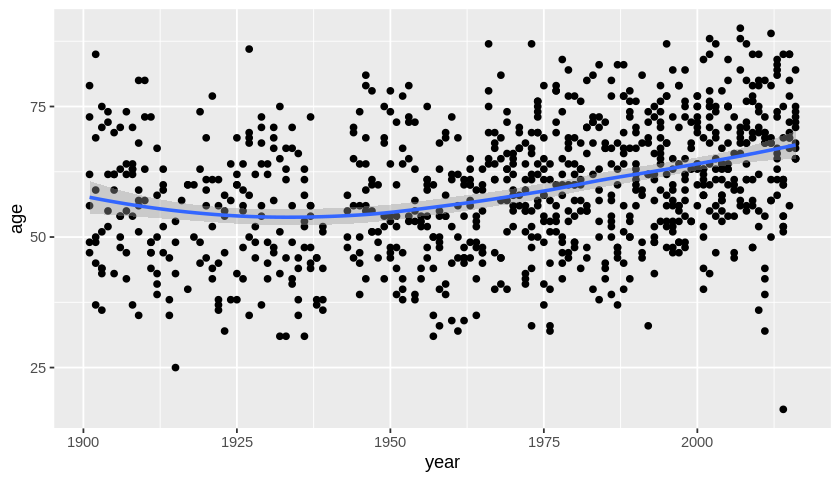

In [28]:
library(lubridate)

# Calculating the age of Nobel Prize winners
nobel_age <- nobel %>%
    mutate(age = year - year(birth_date))


# Plotting the age of Nobel Prize winners
ggplot(nobel_age, aes(year, age)) + 
    geom_point() + geom_smooth()

We see that as the years go by the winners are older compared to previous years, this may be because now the areas of study involve more knowledge that can be gained over the years.

## Age range of the winners in the different categories

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 28 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 28 rows containing missing values (geom_point).”


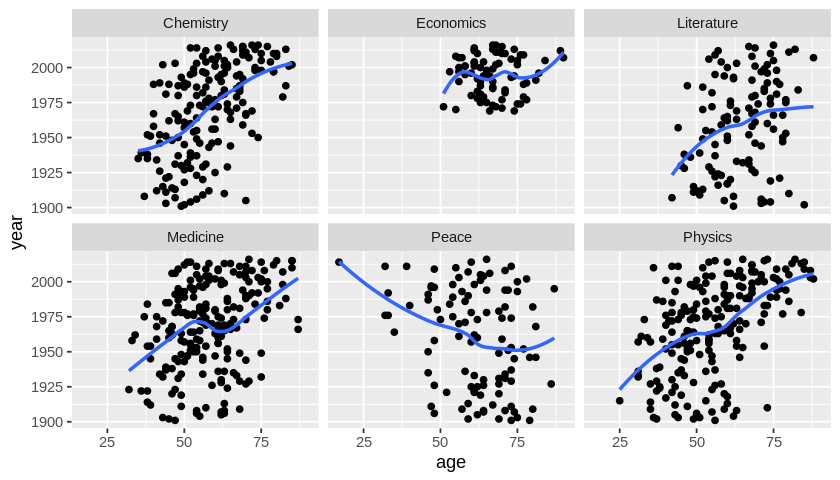

In [29]:
ggplot(nobel_age, aes(age, year)) +
    geom_point() + geom_smooth(se=F) +
    facet_wrap(~category)

While in the *Peace* category the age of the winners has been decreasing in the other categories it has been different as the age of the winners has been increasing.

## Youngest and oldest winner

In [30]:
nobel_age %>% top_n(1, age)

nobel_age %>% top_n(1, desc(age))

year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>
2007,Economics,The Sveriges Riksbank Prize in Economic Sciences 2007,"""for having laid the foundations of mechanism design theory""",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,90


year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>
2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of children and young people and for the right of all children to education""",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NA,NA,NA,NA,NA,NA,17


Finally we get the following data:

- The oldest winner *Leonid Hurwicz* was in the *Economy* category.
- The youngest winner *Malala Yousafzai* was in the category *Peace*.